In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# LOAD DATASET

df_train = pd.read_csv("train.csv")
df_train.head()

,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
0,Manhattan,NaN,2.0,82.5,15.0,254.0,3
1,Manhattan,Private room,2.0,53.7,1.0,0.0,1
2,Brooklyn,Private room,2.0,47.8,70.0,90.0,1
3,Manhattan,Entire home/apt,2.0,58.8,1.0,NaN,1
4,Bronx,Private room,2.0,32.2,0.0,89.0,1


In [10]:
# ENCODE CATEGORICAL COLUMNS

df_train.replace({

    "room_type" : {
        "Entire home/apt" : 1,
        "Private room" : 2, 
        "Shared room" : 3
        },

    "neighbourhood_group" : {
        "Manhattan" : 1, 
        "Brooklyn" : 2, 
        "Queens" : 3, 
        "Bronx" : 4,
        "Staten Island" : 5}
}, inplace=True)

df_train["room_type"] = df_train["room_type"].astype("Int64")
df_train["neighbourhood_group"] = df_train["neighbourhood_group"].astype("Int64")

<Figure size 500x500 with 0 Axes>

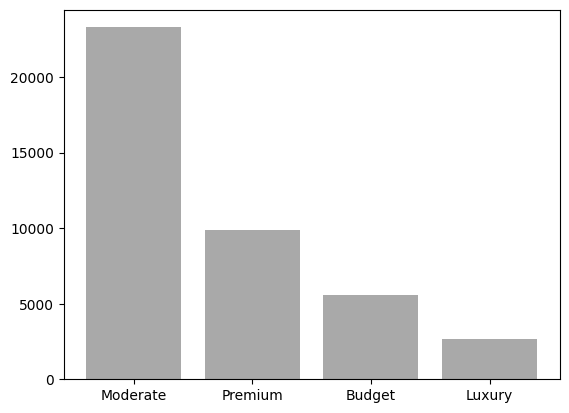

<Figure size 500x500 with 0 Axes>

In [11]:
# PRICE CLASS BAR CHART

val_counts = df_train["price_class"].value_counts()

price_dict = {
    0.0 : "Budget",
    1.0 : "Moderate",
    2.0 : "Premium",
    3.0 : "Luxury"
}
val_counts

plt.bar([price_dict[i] for i in val_counts.keys()], val_counts.values, facecolor="darkgrey")
plt.savefig("images/price_class_valcount.png")
plt.figure(figsize=(5,5))

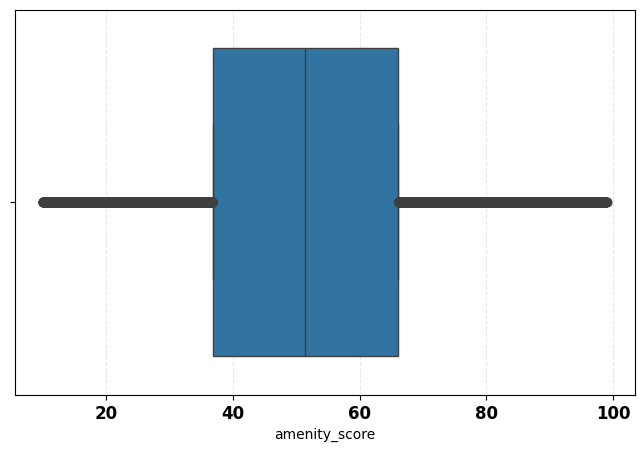

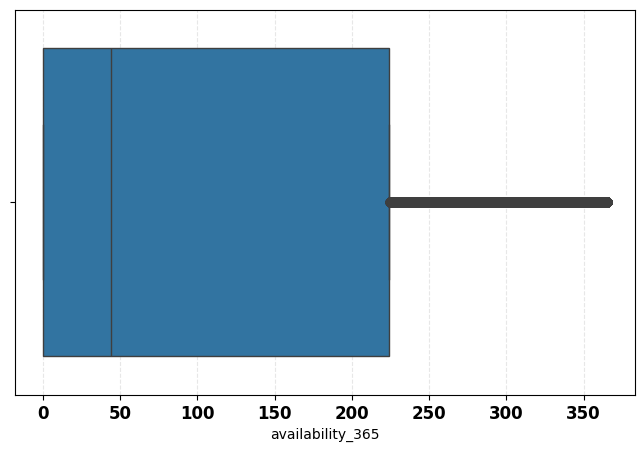

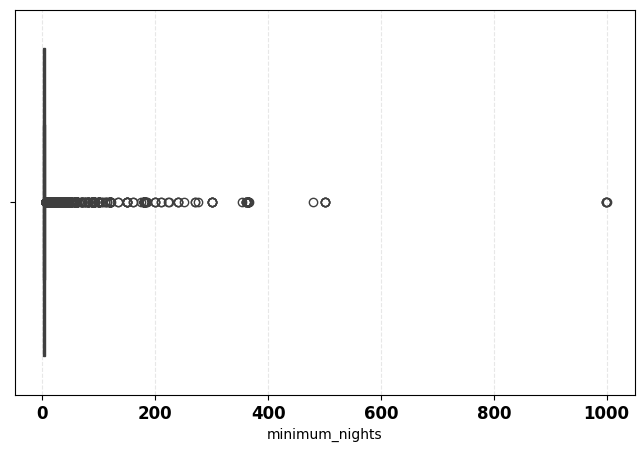

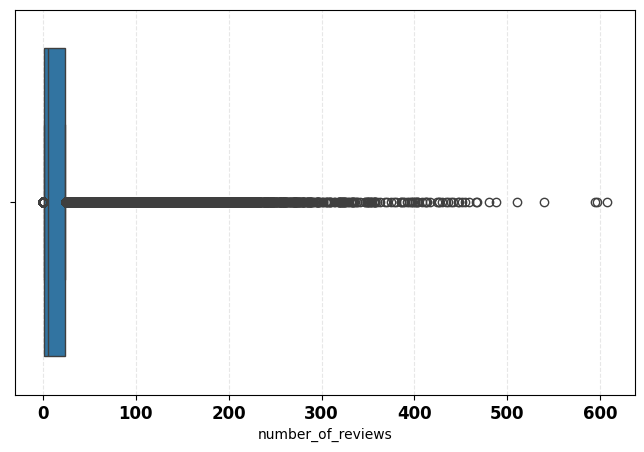

In [12]:
# BOXPLOTS

def plot_and_save(column, filename, title):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df_train[column], whis=[25,75])
    # plt.title(title, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold') 
    plt.yticks(fontsize=12, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.savefig("images/"+filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

plot_and_save('amenity_score', 'amenity_score_boxplot.png', 'Amenity Score')
plot_and_save('availability_365', 'availability_boxplot.png', 'Availability')
plot_and_save('minimum_nights', 'min_nights_boxplot.png', 'Minimum Nights')
plot_and_save('number_of_reviews', 'num_review_boxplot.png', 'Number of Reviews')


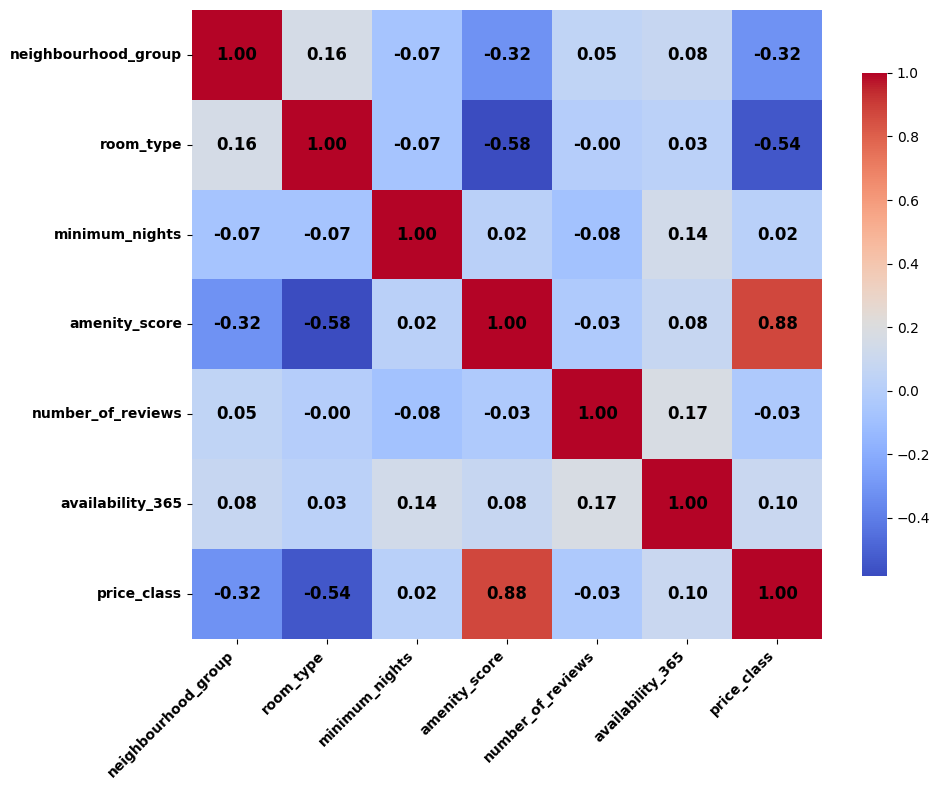

In [13]:
# CORRELATION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

corr_matrix = df_train.corr()

sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",
    annot_kws={"size":12, "weight":"bold", "color":"black"},  # make text bold and black
    cbar_kws={"shrink":0.8}  # optional: smaller colorbar
)

plt.xticks(rotation=45, ha='right', weight='bold')  # x-axis labels bold
plt.yticks(rotation=0, weight='bold')               # y-axis labels bold

plt.tight_layout()
plt.savefig("images/corr_matrix.png", dpi=300)  # high-res figure
plt.show()


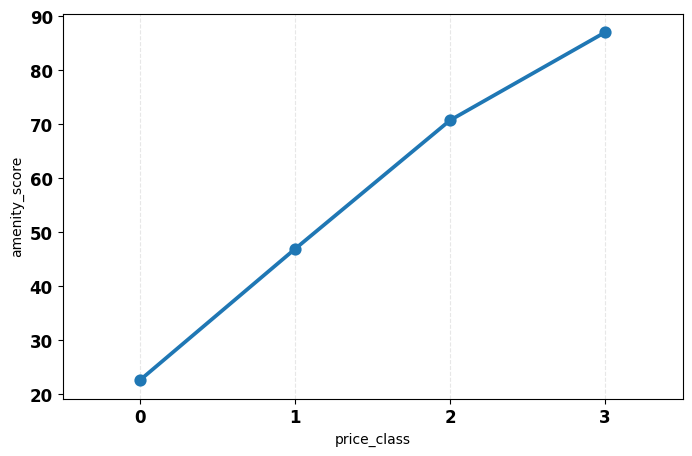

In [14]:
# AMENITY SCORE POINT PLOT

plt.figure(figsize=(8,5))
sns.pointplot(x='price_class', y='amenity_score', data=df_train)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.savefig("images/amenity_score_pointplot.png", dpi=300, bbox_inches='tight')
plt.show()